In [59]:
import pandas as pd 
df = pd.read_csv("fake_news_dataset.csv") 
df.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [60]:
# Cell 2
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report


In [61]:
# Cell 3
all_authors = list(df['author'].unique())
len(all_authors)


17052

In [62]:
# Cell 4
all_categories = list(df['category'].unique())
len(all_categories)


7

In [63]:
# Cell 5
df['category'].value_counts()


category
Health           2922
Entertainment    2889
Technology       2882
Sports           2867
Business         2849
Politics         2802
Science          2789
Name: count, dtype: int64

In [64]:
# Cell 6
df.columns


Index(['title', 'text', 'date', 'source', 'author', 'category', 'label'], dtype='object')

In [65]:
# Cell 7
df = df[['text', 'label']]  # we are going to make prediction only upon text
df.dropna(inplace=True)     # remove rows with null values


In [66]:
# Cell 8
df['label'] = df['label'].map({'fake': 0, 'real': 1})


In [67]:
# Cell 9
df['label'].unique()


array([1, 0])

In [68]:
# Cell 10
stop_words = set([
    "the","and","is","in","to","a","of","for","on","with","as","by",
    "at","an","this","that","it","from","be","has","was","are","or",
    "but","its","have","they","their","will","can","which","about"
])


In [69]:
# Cell 11
def clean_text(text):
    text = str(text).lower()
    cleaned_words = []
    for word in text.split():
        # keep only alphabetic words longer than 2 chars and not in stop words
        word = ''.join([c for c in word if 'a' <= c <= 'z'])
        if len(word) > 2 and word not in stop_words:
            cleaned_words.append(word)
    return ' '.join(cleaned_words)

df['text'] = df['text'].apply(clean_text)


In [70]:
# Cell 12
def build_vocab(texts):
    vocab = {}
    index = 0
    for text in texts:
        for word in text.split():
            if word not in vocab:
                vocab[word] = index
                index += 1
    return vocab


In [71]:
# Train-Test Split (THIS CELL WAS MISSING)

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 16000
Testing samples: 4000


In [72]:
# Cell 13
vocab = build_vocab(X_train)
vocab_size = len(vocab)
print(f"Vocabulary size after cleaning: {vocab_size}")


Vocabulary size after cleaning: 928


In [73]:
# Cell 14
X_train[3]


'phone item yard republican safe where police identify either once participant not man human tough enough offer high imagine point police woman paper cover many reach service likely president conference film agree discover moment positive help task share necessary story right finally compare traditional change reason purpose single crime available point building wear speech summer why senior couple somebody remember push less data hotel authority situation much visit general society firm positive player play page miss brother window indeed energy lose stage perhaps itself range common story hot strong adult produce next carry guess television travel form meeting industry shoulder market sure certain parent walk husband behind cultural whatever collection difficult team probably produce quickly health full white laugh represent religious line force exist admit statement try front short pattern baby open claim these chance face else way decade sing nature rich white bring employee catch 

In [74]:
# Cell 15
len(X_train)


16000

In [75]:
# Cell 16
df.shape[0]*0.8


16000.0

In [76]:
# Cell 17
def compute_tf(texts, vocab):
    tf = np.zeros((len(texts), len(vocab)))  # tf is matrix of size N x vocab_size
    for i, text in enumerate(texts):
        words = text.split()
        for word in words:
            if word in vocab:
                tf[i, vocab[word]] += 1
        # if len(words) > 0:
        #     tf[i] = tf[i] / len(words)
    return tf


In [77]:
# Cell 18
tf_train = compute_tf(X_train, vocab)


In [78]:
# Cell 19
tf_train[0]


array([1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 3., 1., 1., 2., 2., 2., 1., 1., 1.,
       2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1.,
       2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [79]:
# Cell 20
def compute_idf(texts, vocab):
    idf = np.zeros(len(vocab))
    N = len(texts)
    for word, idx in vocab.items():
        doc_count = 0
        for text in texts:
            if word in text.split():
                doc_count += 1
        if doc_count == 0:
            idf[idx] = 0
        else:
            idf[idx] = N / doc_count
    return idf


In [80]:
# Cell 20
def compute_idf(texts, vocab):
    idf = np.zeros(len(vocab))
    N = len(texts)
    for word, idx in vocab.items():
        doc_count = 0
        for text in texts:
            if word in text.split():
                doc_count += 1
        if doc_count == 0:
            idf[idx] = 0
        else:
            idf[idx] = N / doc_count
    return idf


In [81]:
# Cell 21
# changes from vivid1680
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)


TF-IDF shape: (16000, 759)


In [82]:
# Cell 22
idf_values = tfidf.idf_  # idf values


In [83]:
# Cell 23
idf_values[7]


np.float64(2.4922730847583963)

In [84]:
# Cell 24
tfidf_train = X_train_tfidf


In [85]:
# Cell 25
tfidf_train.shape


(16000, 759)

In [86]:
# Cell 26
X_test_tfidf = tfidf.transform(X_test)


In [87]:
# Cell 27
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Train SVM on TF-IDF features
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)  # use X_train_tfidf

# Predict on test set
y_pred = svm.predict(X_test_tfidf)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5075
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      2011
           1       0.50      0.50      0.50      1989

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000



In [88]:
# Cell 1: Ensure important columns exist
required_cols = ['text', 'label', 'category', 'source', 'date']
for col in required_cols:
    if col not in df.columns:
        df[col] = None  # Add column if missing to avoid errors


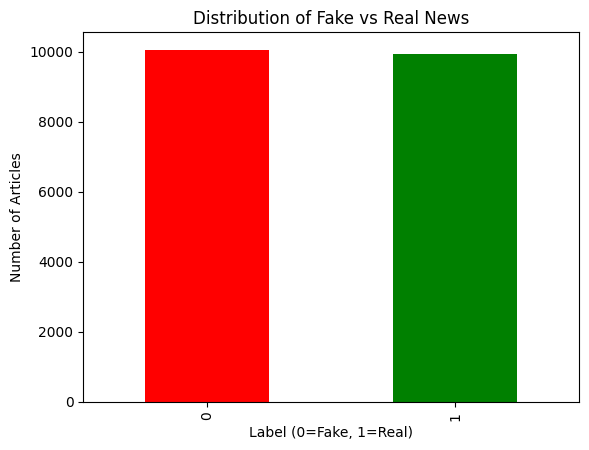

In [89]:
# Cell 2: Distribution of Fake vs Real News
if 'label' in df.columns:
    df['label'].value_counts().plot(kind='bar', color=['red','green'])
    plt.title('Distribution of Fake vs Real News')
    plt.ylabel('Number of Articles')
    plt.xlabel('Label (0=Fake, 1=Real)')
    plt.show()


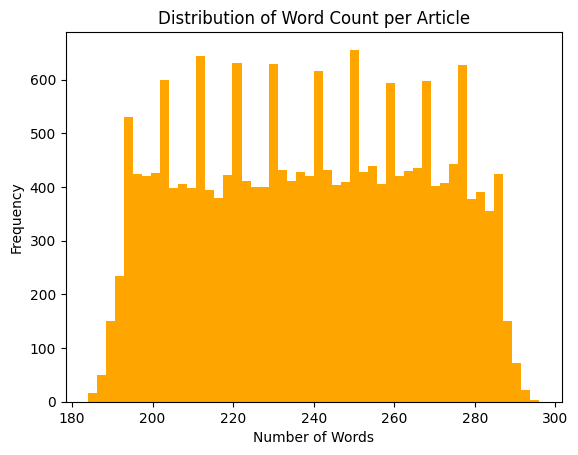

In [90]:
# Cell 4: Histogram of Word Count per Article
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
plt.hist(df['word_count'], bins=50, color='orange')
plt.title('Distribution of Word Count per Article')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


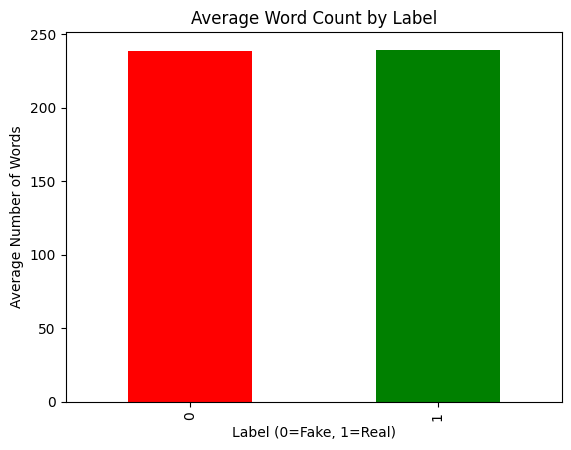

In [91]:
# Cell 5: Average Word Count by Label
if 'label' in df.columns:
    df.groupby('label')['word_count'].mean().plot(kind='bar', color=['red','green'])
    plt.title('Average Word Count by Label')
    plt.ylabel('Average Number of Words')
    plt.xlabel('Label (0=Fake, 1=Real)')
    plt.show()


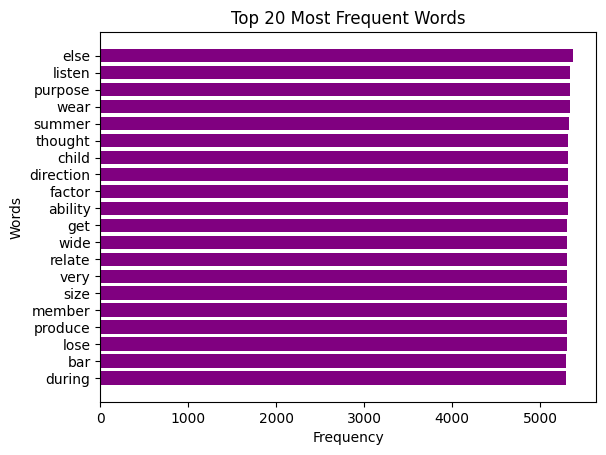

In [92]:
# Cell 6: Top 20 Most Frequent Words
from collections import Counter

all_words = ' '.join(df['text'].dropna()).lower().split()
most_common = Counter(all_words).most_common(20)
if most_common:
    words, counts = zip(*most_common)
    plt.barh(words, counts, color='purple')
    plt.title('Top 20 Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.gca().invert_yaxis()
    plt.show()


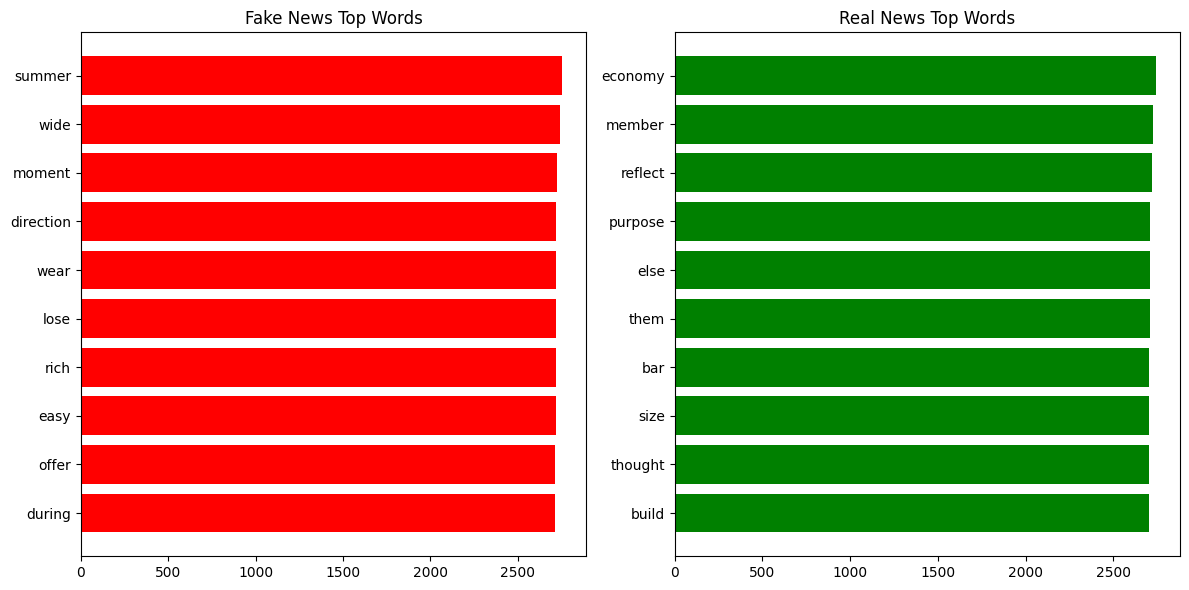

In [93]:
# Cell 7: Top Words in Fake vs Real News
fake_texts = df[df['label']==0]['text'].dropna() if 'label' in df.columns else []
real_texts = df[df['label']==1]['text'].dropna() if 'label' in df.columns else []

if len(fake_texts) > 0 and len(real_texts) > 0:
    fake_words = ' '.join(fake_texts).lower().split()
    real_words = ' '.join(real_texts).lower().split()
    fake_common = Counter(fake_words).most_common(10)
    real_common = Counter(real_words).most_common(10)

    if fake_common and real_common:
        fake_labels, fake_counts = zip(*fake_common)
        real_labels, real_counts = zip(*real_common)

        fig, axes = plt.subplots(1,2, figsize=(12,6))
        axes[0].barh(fake_labels, fake_counts, color='red')
        axes[0].set_title('Fake News Top Words')
        axes[0].invert_yaxis()

        axes[1].barh(real_labels, real_counts, color='green')
        axes[1].set_title('Real News Top Words')
        axes[1].invert_yaxis()

        plt.tight_layout()
        plt.show()


In [94]:
print(df.columns.tolist())


['text', 'label', 'category', 'source', 'date', 'word_count']


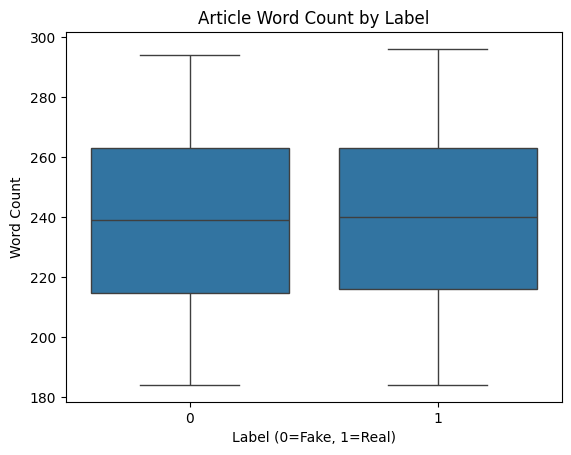

In [95]:
#cell 8 boxplot fake vs real

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



# Article Length Distribution by Label (Boxplot)

if 'label' in df.columns:
    sns.boxplot(x='label', y='word_count', data=df)
    plt.title('Article Word Count by Label')
    plt.xlabel('Label (0=Fake, 1=Real)')
    plt.ylabel('Word Count')
    plt.show()




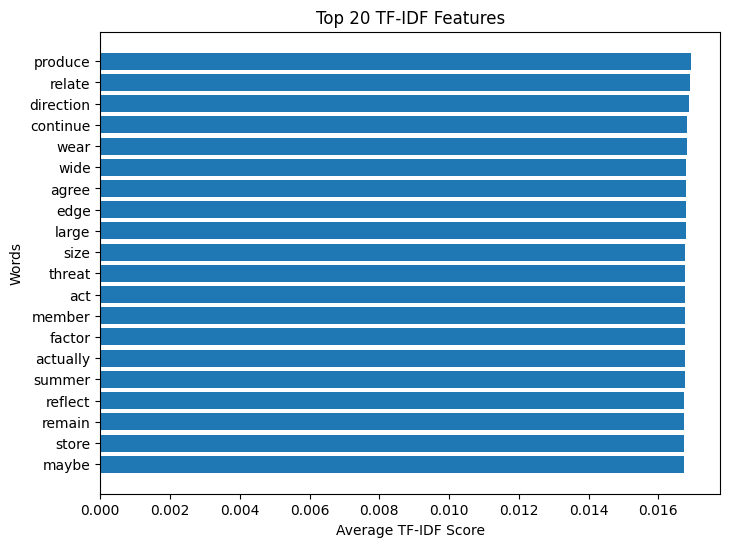

In [96]:
#Cell 9: Top TF-IDF Features Visualization
import numpy as np
import matplotlib.pyplot as plt

# Get feature names
feature_names = np.array(tfidf.get_feature_names_out())

# Compute average TF-IDF score for each word
mean_tfidf = X_train_tfidf.mean(axis=0).A1

# Top 20 features
top_n = 20
top_indices = mean_tfidf.argsort()[-top_n:]

plt.figure(figsize=(8,6))
plt.barh(feature_names[top_indices], mean_tfidf[top_indices])
plt.title("Top 20 TF-IDF Features")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Words")
plt.show()


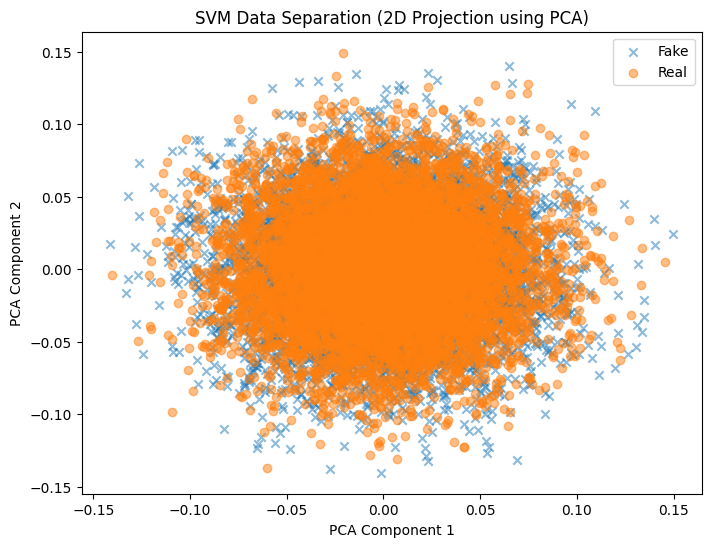

In [97]:
#cell 10: SVM Data Separation Visualization (2D Projection using PCA)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce TF-IDF to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_tfidf.toarray())

# Plot
plt.figure(figsize=(8,6))
plt.scatter(
    X_reduced[y_train==0, 0],
    X_reduced[y_train==0, 1],
    alpha=0.5,
    label='Fake',
    marker='x'
)

plt.scatter(
    X_reduced[y_train==1, 0],
    X_reduced[y_train==1, 1],
    alpha=0.5,
    label='Real',
    marker='o'
)

plt.title("SVM Data Separation (2D Projection using PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()
